# Lab 2


### Exercise 1 - binary search, round 2
<!-- rubric={code:3} -->

In lab 1 you wrote code to implement binary search, in order to check whether a sorted array contains a particular value. Now, write a recursive implementation of that function. Also, write some tests to check whether it seems to be working.


In [6]:
def search_sorted_rec(data, key):
    pass # your code here

### Exercise 2 - recursive graphics
<!-- rubric={code:8,reasoning:2} -->

In this exercise you will use recursion to draw the Sierpinski triangle. An image of one such triangle (depth 7) is shown below.

![](sierpinski_7.png)

To help you do this, we are providing some code in the cell below. The `draw_triangle` function draws a triangle for you. When you are done calling `draw_triangle` as many times as you wish, call `show_triangles` once to render everything to the screen. **You do not need to understand how the code below works. You only need to understand how to use it.** In other words, read the comments above each function and the sample usage below the functions, but you don't need to read the code inside the functions.

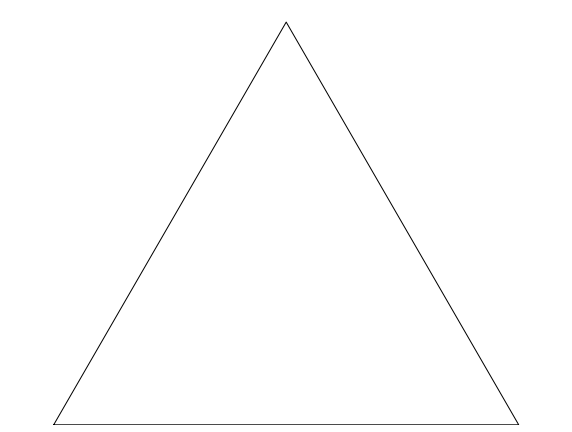

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# draw an equilateral triangle at (x,y) with side length side_length.
# the convention is that (x,y) represents the midpoint of the base, not the centre of the triangle
def draw_triangle(x, y, side):
    height = np.sqrt(3)*side/2;
    plt.plot([x-side/2.0, x+side/2.0, x, x-side/2.0],[y, y, y+height, y], 'k')

# make the Sierpinski triangle image look pretty.
def show_triangles(save=False):
    plt.gcf().set_size_inches(10,8.6)
    plt.axis('scaled')
    plt.axis('off')
    plt.tick_params(labelbottom='off', labelleft='off')
    if save:
        plt.tight_layout()
        plt.savefig('sierpinski.png')
    plt.show()
    
draw_triangle(0,0,1) # example: a single triangle
show_triangles() # show the triangle

Another example is given below: a Sierpinski triangle with depth 1, drawn without using recursion but just by calling `draw_triangles` 3 times. The point of this is that we provide you with (most of) the geometry, so you can focus on recursion and be less likely to get stuck on the geometry aspects.

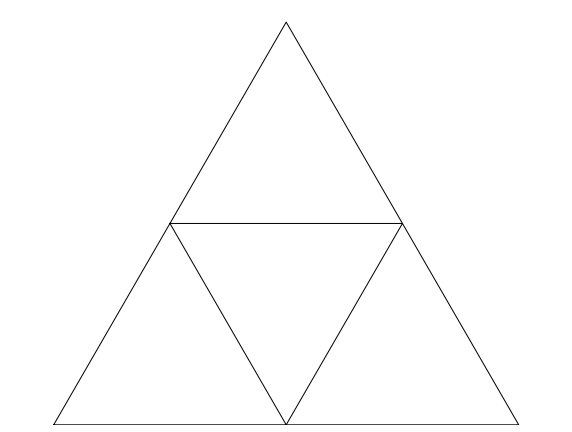

In [4]:
draw_triangle(-0.25, 0, 0.5)
draw_triangle(+0.25, 0, 0.5)
draw_triangle(0, (0.5*(np.sqrt(3)/2)), 0.5)
show_triangles()

Your tasks are as follows:
2. Write a recursive function `sierpinski` that takes four arguments: the depth `n`, the coordinates `x` and `y`, and the side length of the outermost triangle, `size`. Then, use your function to reproduce the figure above of the Sierpinski triangle with depth 7. Some starter code is provided below. Hints:
    - your function should only call `draw_triangle` once
    - your function should call itself 3 times
1. Spend a few minutes contemplating how you would implement this without recursion. Once you have reached a sufficiently hopeless state of mind, record your thoughts here as part of your submission.
3. What is the running time of your code, as a function of $n$?

### Exercise 3 - Compare the speed of tree-based set to Python's built-in hash-based set.
<!-- rubric={code:8,reasoning:3} -->

##### Introduction
In this exercise, you will implement a symbol table based on a binary tree, and then compare it with Python's `set`, which use a hash table under the hood. 

##### Implementation
To keep track of your tree, you will use a bunch of Python dicts, which in turn contain other dicts. The dicts at leaf nodes will be empty. All other dicts will contain the following keys: `'value'` for the stored element, `'left'` for the left subtree, and `'right'` for the right subtree. NOTE: this is not necessarily the most natural way of doing things; it's just the way that we can do knowing what we know now. In DSCI 524 we will revisit this assignment and reimplement our tree using user-defined Python classes.

##### Your tasks
1. Write a _recursive_ function `insert` that takes your tree and a new element, and inserts it into the tree. If the element is already in the tree, then the call to `insert` should do nothing. (If this is helpful: We will do all our insertions at leaves only. If that didn't make sense, just ignore it.)
2. Write a _recursive_ function `search` that takes your tree and a query, and checks whether that element is present in the tree. If present, it should return `True` and otherwise `False`. (Hint: this is similar to Exercise 2 above).
4. Empirically compare the speed of your tree implementation to Python's native `set`, for both insertion and searching.
5. What is the time complexity of the insert and search operations in the best case? Average case? What about the worst case? Hint: don't try to find the  worst case by empirical guess-and-check. Instead, think about a sequence  of inputs that will result in each operation taking a long time. Once you've thought of something, then you can test it out empirically, if you wish. 

In [28]:
# here is some code that should work once you have written your insert function
tree = dict() # make a new tree. NOTE: you may change this to a defaultdict if that is helpful.
insert(tree, "hello")
insert(tree, "data science")
insert(tree, "jerry")
insert(tree, "apple")
insert(tree, "17")

import pprint
pprint.pprint(tree)

{'left': {'left': {'left': {'value': '17'}, 'value': 'apple'},
          'value': 'data science'},
 'right': {'value': 'jerry'},
 'value': 'hello'}


In [29]:
# here is some code that should work once you have written your search function
# assumes the previous cell has already been run
assert search(tree, "data science")
assert not search(tree, "18")
assert not search(tree, "blah")
assert search(tree, "apple")